In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#import data set
data = pd.read_excel(r"C:\analytics\data\Flight Data.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.shape

(10683, 11)

In [5]:
data.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO 

In [6]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data[ data['Price']==79512.000000 ]#max price flight information

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [9]:
data[ data['Price']==1759.000000 ] #minimum Price flight information

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4066,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
4274,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
4839,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
10513,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759


In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
data['Total_Stops'] = data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data['Route'] = data['Route'].fillna(data['Route'].mode()[0])

In [14]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
##null values taken care off
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data['Airline'].nunique() #number of Airline in the dataset

12

In [17]:
data['Airline'].unique() ## name of all 12 Airlines

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
## Airline's frequencies
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [19]:
data['Airline'].value_counts(ascending=True)

Airline
Trujet                                  1
Vistara Premium economy                 3
Jet Airways Business                    6
Multiple carriers Premium economy      13
GoAir                                 194
Air Asia                              319
Vistara                               479
SpiceJet                              818
Multiple carriers                    1196
Air India                            1752
IndiGo                               2053
Jet Airways                          3849
Name: count, dtype: int64

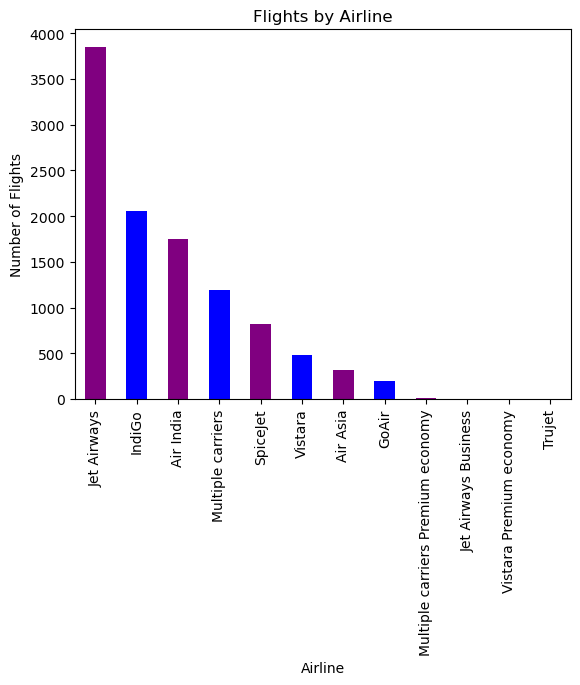

In [20]:
data['Airline'].value_counts().plot(kind='bar',color={'purple','blue'})

plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Flights by Airline')
plt.show()

In [21]:
##bar chart presenting the departure & arrival time of all the flights
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [22]:
data['Dep_Time'].value_counts()

Dep_Time
18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:50      1
12:45      1
12:05      1
21:40      1
03:00      1
Name: count, Length: 222, dtype: int64

In [23]:
data['Arrival_Time'].value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:50 28 Jun      1
22:40 07 Jun      1
06:50 10 Mar      1
00:05 19 Mar      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [25]:
data['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [26]:
data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

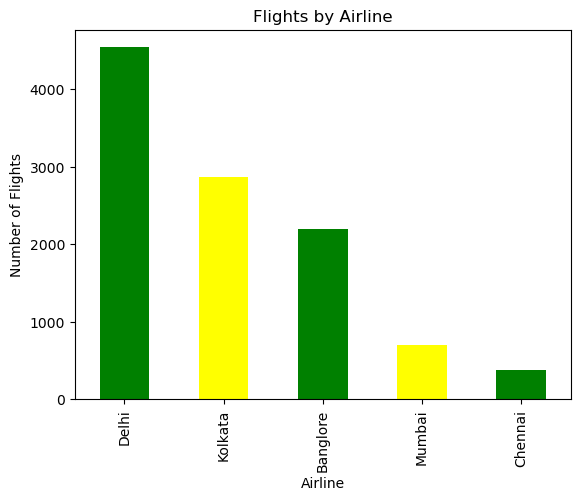

In [27]:
data['Source'].value_counts().plot(kind='bar',color={'green','yellow'})
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Flights by Airline')
plt.show()

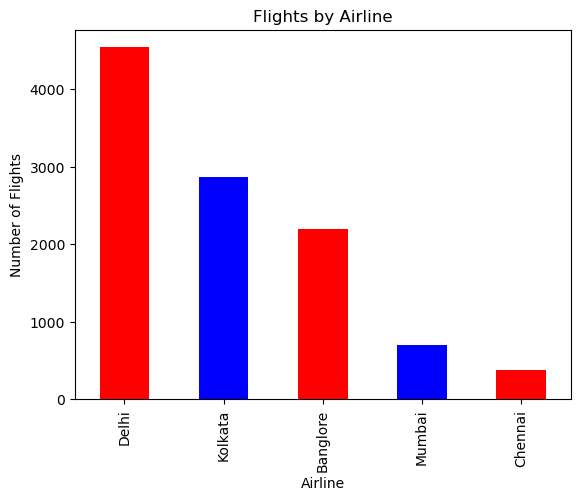

In [28]:
data['Source'].value_counts().plot(kind='bar',color={'red','blue'})
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Flights by Airline')
plt.show()

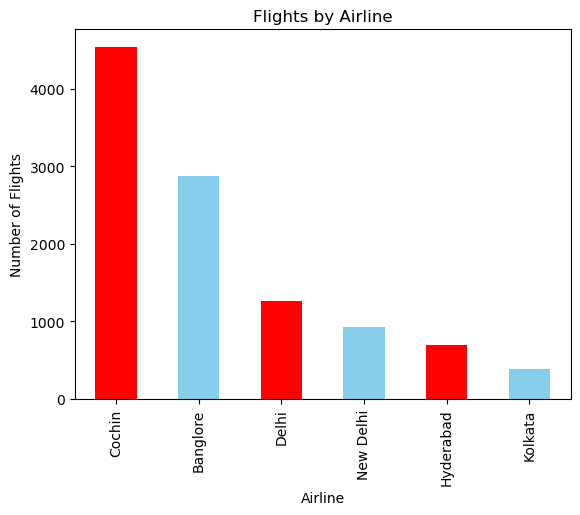

In [29]:
data['Destination'].value_counts().plot(kind='bar',color={'red','skyblue'})
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Flights by Airline')
plt.show()

In [30]:
data.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [32]:
sns.catplot(x='Airline',y='Price',kind='bar',data=data)
plt.show()

NameError: name 'sns' is not defined